In [1]:
import tensorflow as tf
from tensorflow import keras

In [12]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

In [13]:
import numpy as np
import pandas as pd

# be sure to change the file path
# if you have the dataset in another
# directly than the working folder
df = pd.read_csv('winequality-red.csv')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)


In [15]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range


In [16]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape


[11]

In [17]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [18]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [19]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae')


In [20]:
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=256,
				epochs=15, # total epoch

				)


Epoch 1/15
5/5 [==============================] - 1s 87ms/step - loss: 0.5296 - val_loss: 0.3846
Epoch 2/15
5/5 [==============================] - 0s 10ms/step - loss: 0.3029 - val_loss: 0.1654
Epoch 3/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1370 - val_loss: 0.1374
Epoch 4/15
5/5 [==============================] - 0s 15ms/step - loss: 0.1558 - val_loss: 0.1583
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1472 - val_loss: 0.1249
Epoch 6/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1216 - val_loss: 0.1160
Epoch 7/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1215 - val_loss: 0.1198
Epoch 8/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1203 - val_loss: 0.1123
Epoch 9/15
5/5 [==============================] - 0s 19ms/step - loss: 0.1135 - val_loss: 0.1118
Epoch 10/15
5/5 [==============================] - 0s 19ms/step - loss: 0.1128 - val_loss: 0.1110
Epoch 11/15
5/5 [=================

In [21]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])


1/1 [==============================] - 0s 86ms/step


array([[0.41747874],
       [0.5349285 ],
       [0.37683392]], dtype=float32)

In [22]:
y_val.iloc[0:3]


0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

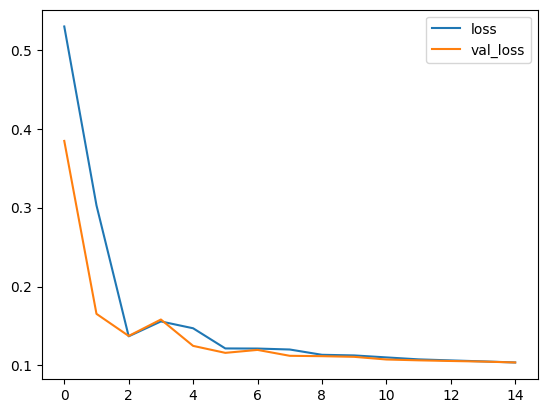

In [23]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()
